# Pytorch
PyTorch (https://pytorch.org/) is an open-source Python-based deep learning library.

PyTorch's three main components include a tensor library as a fundamental building block for
computing, automatic differentiation for model optimization, and deep learning utility functions, making it
easier to implement and train deep neural network models.

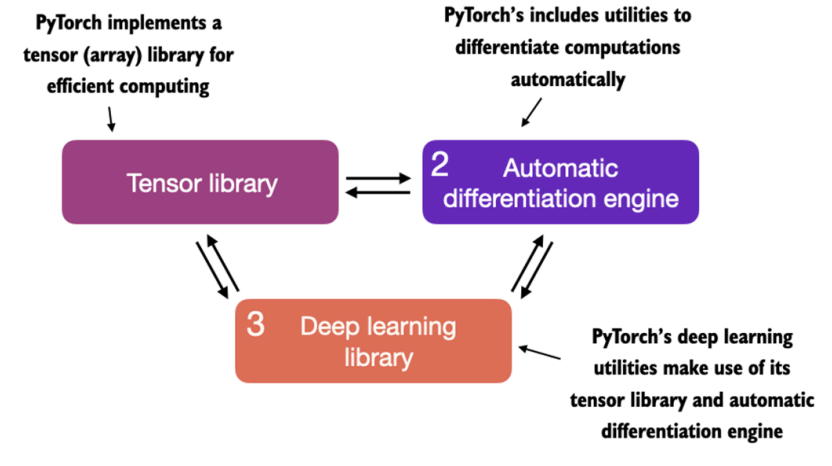


## Installing PyTorch

```bash
pip install torch
```

Access the PyTorch installation recommendation on https://pytorch.org to customize and select the
installation command for your system.
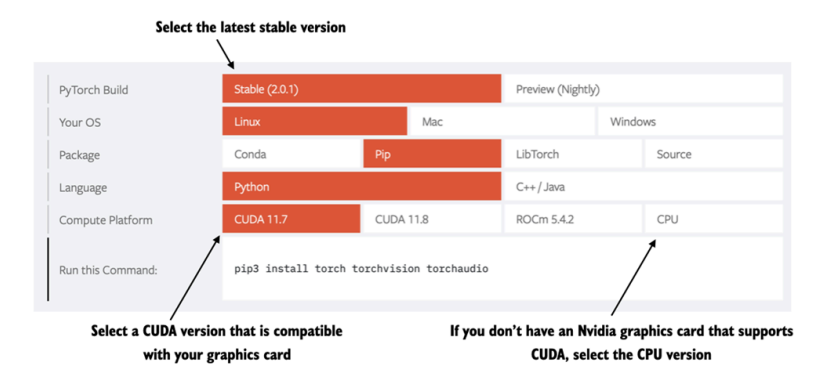

To check the version of PyTorch, you can execute the following code in PyTorch:
```bash
import torch
torch.__version__
```

After installing PyTorch, you can check whether your installation recognizes your built-in
NVIDIA GPU by running the following code in Python:
```bash
import torch
torch.cuda.is_available()
```
If the command returns False, your computer may not have a compatible GPU, or PyTorch does not recognize it.

--

Apple Mac with an Apple Silicon chip (like the M1, M2, M3, or newer models), you have the option to leverage its capabilities to accelerate PyTorch code execution. To use your Apple Silicon chip for PyTorch, you first need to install PyTorch as you normally would. Then, to check if your Mac supports PyTorch acceleration with its Apple Silicon chip, you can run a simple code snippet in Python:
```bash
print(torch.backends.mps.is_available())
```
If it returns True, it means that your Mac has an Apple Silicon chip that can be used to accelerate PyTorch code


## Tensors
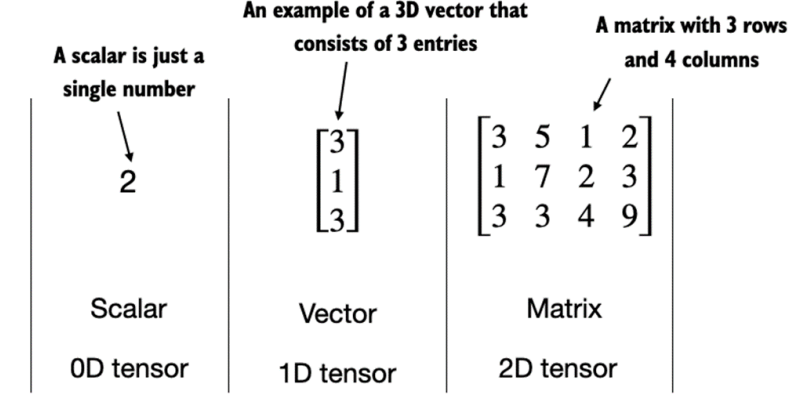

PyTorch tensors are data containers for array-like structures. A scalar
is a 0-dimensional tensor (for instance, just a number), a vector is a 1-dimensional tensor,
and a matrix is a 2-dimensional tensor. There is no specific term for higher-dimensional
tensors, so we typically refer to a 3-dimensional tensor as just a 3D tensor, and so forth.
We can create objects of PyTorch's Tensor class using the torch.tensor function

In [1]:
import torch
torch.__version__

'2.9.0+cu128'

### Scalars, vectors, matrices, and tensors

In [9]:
# create a 0D tensor (scalar) from a Python integer
tensor0d = torch.tensor(1)
print(f"0D Tensor: {tensor0d}, Shape: {tensor0d.shape}, Type: {tensor0d.dtype}, Dimensions: {tensor0d.ndim}", end="\n\n")
# create a 1D tensor (vector) from a Python list
tensor1d = torch.tensor([1, 2, 3])
print(f"1D Tensor: {tensor1d}, Shape: {tensor1d.shape}, Type: {tensor1d.dtype}, Dimensions: {tensor1d.ndim}", end="\n\n")
#  create a 2D tensor from a nested Python list
tensor2d = torch.tensor([[1, 2], [3, 4]])
print(f"2D Tensor: {tensor2d}, Shape: {tensor2d.shape}, Type: {tensor2d.dtype}, Dimensions: {tensor2d.ndim}", end="\n\n")
# create a 3D tensor from a nested Python list
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f"3D Tensor: {tensor3d}, Shape: {tensor3d.shape}, Type: {tensor3d.dtype}, Dimensions: {tensor3d.ndim}", end="\n\n")

0D Tensor: 1, Shape: torch.Size([]), Type: torch.int64, Dimensions: 0

1D Tensor: tensor([1, 2, 3]), Shape: torch.Size([3]), Type: torch.int64, Dimensions: 1

2D Tensor: tensor([[1, 2],
        [3, 4]]), Shape: torch.Size([2, 2]), Type: torch.int64, Dimensions: 2

3D Tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]), Shape: torch.Size([2, 2, 2]), Type: torch.int64, Dimensions: 3



### Tensor data types
PyTorch adopts the default 64-bit integer data type from Python. We can access the data type of a tensor via the .dtype attribute of a tensor.
```python
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)
```
This Prints
```bash
torch.int64
```

If we create tensors from Python floats, PyTorch creates tensors with a 32-bit precision by default, as we can see below:
```python
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)
```
The output is:
```bash
torch.float32
```

This choice is primarily due to the balance between precision and computational efficiency.
A 32-bit floating point number offers sufficient precision for most deep learning tasks, while
consuming less memory and computational resources than a 64-bit floating point number.
Moreover, GPU architectures are optimized for 32-bit computations, and using this data
type can significantly speed up model training and inference.

Moreover, it is possible to readily change the precision using a tensor's .to method.
The following code demonstrates this by changing a 64-bit integer tensor into a 32-bit float tensor:
```python
floatvec = tensor1d.to(torch.float32)
```

### Common PyTorch tensor operations
```torch.tensor()``` function to create new tensors.

```python
tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor2d)
```
This Prints:
```bash
tensor([[1, 2, 3],
        [4, 5, 6]])
```

```.shape``` attribute allows us to access the shape of a tensor
```print(tensor2d.shape)```
The output is:
```bash
torch.Size([2, 3])
```
.shape returns [2, 3], which means that the tensor has 2 rows and 3 columns.
To reshape the tensor into a 3 by 2 tensor, we can use the ```.reshape``` method:
```python
print(tensor2d.reshape(3, 2))
```
This prints:
```bash
tensor([[1, 2],
        [3, 4],
        [5, 6]])
```

However, the more common command for reshaping tensors in PyTorch is ```.view()```:
```python
print(tensor2d.view(3, 2))
```
The output is:
```bash
tensor([[1, 2],
        [3, 4],
        [5, 6]])
```
there are several cases where PyTorch offers multiple syntax options for executing the same computation. This is because PyTorch initially
followed the original Lua Torch syntax convention but then also added syntax to make it more similar to NumPy upon popular request.

we can use ```.T``` to transpose a tensor, which means flipping it across its diagonal.
Note that this is similar from reshaping a tensor
```python
print(tensor2d.T)
```
The output is:
```bash
tensor([[1, 4],
        [2, 5],
        [3, 6]])
```
the common way to multiply two matrices in PyTorch is the ```.matmul``` method:
```python
print(tensor2d.matmul(tensor2d.T))
```
The output is:
```bash
tensor([[14, 32],
        [32, 77]])
```

However, we can also adopt the @ operator, which accomplishes the same thing more
compactly:
```python
print(tensor2d @ tensor2d.T)
```
This prints:

```bash
tensor([[14, 32],
        [32, 77]])
```

In [12]:
tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor2d)
print()
print(tensor2d.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])

torch.Size([2, 3])


In [14]:
print(tensor2d.reshape(3, 2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [15]:
print(tensor2d.view(3, 2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [16]:
print(tensor2d.T)

tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [17]:
print(tensor2d.matmul(tensor2d.T))

tensor([[14, 32],
        [32, 77]])


In [18]:
print(tensor2d @ tensor2d.T)

tensor([[14, 32],
        [32, 77]])


## Seeing models as computation graphs

PyTorch's automatic differentiation engine also known as autograd.
PyTorch's autograd system provides functions to compute gradients in dynamic computational graphs automatically.

A computational graph (or computation graph in short) is a directed graph that allows us to express and visualize mathematical expressions. In the context of deep learning, a computation graph lays out the sequence of calculations needed to compute the output of a neural network.



Let's look at a concrete example to illustrate the concept of a computation graph. The
following code implements the forward pass (prediction step) of a simple logistic regression
classifier, which can be seen as a single-layer neural network, returning a score between 0
and 1 that is compared to the true class label (0 or 1) when computing the loss:

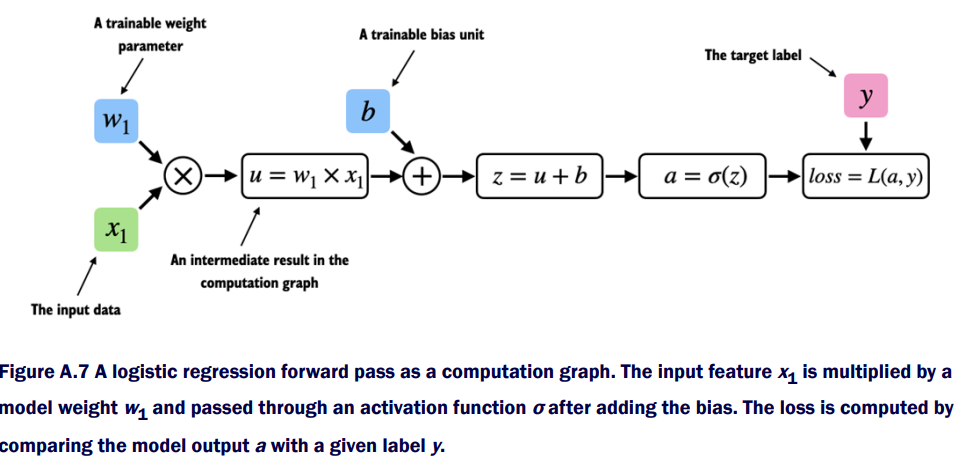

In [19]:
import torch.nn.functional as F  #This import statement is a common convention in PyTorch to prevent long lines of code

y = torch.tensor([1.0]) # True label
x1 = torch.tensor([1.1]) # Input feature
w1 = w1 = torch.tensor([2.2]) # Weight parameter
b = torch.tensor([0.0]) # Bias unit

# Linear combination
z = w1 * x1 + b # net input

# Activation function (sigmoid)
a = torch.sigmoid(z) # activation & output

# Loss computation (binary cross-entropy)
loss = F.binary_cross_entropy(a, y) # loss

## Automatic differentiation
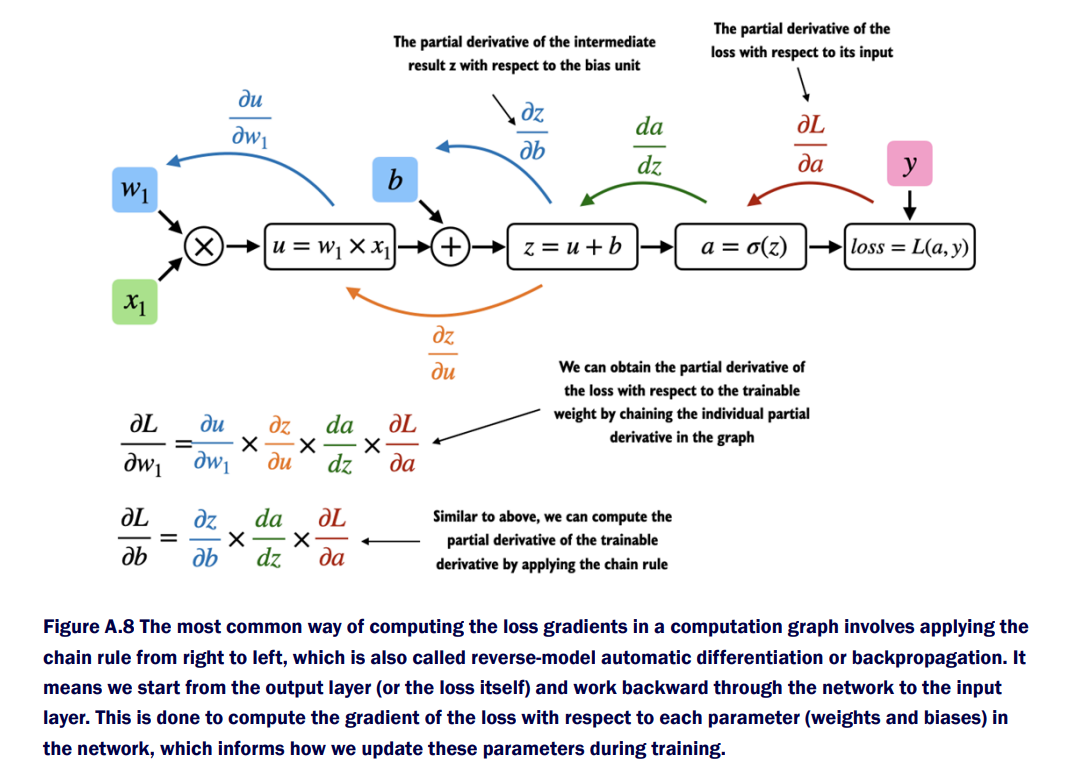

Abive figure shows partial derivatives, which measure the rate at which a function changes with respect to one of its variables.
A gradient is a vector containing all of the partial derivatives of a multivariate function, a function with more than one variable as input.

On a high level, the chain rule is a way to compute gradients of a loss function with respect to the model's
parameters in a computation graph. This provides the information needed to update each
parameter in a way that minimizes the loss function, which serves as a proxy for measuring
the model's performance, using a method such as gradient descent.

Now, how is this all related to the second component of the PyTorch library, the automatic differentiation (autograd) engine? By tracking every operation performed on tensors, PyTorch's autograd engine constructs a computational
graph in the background. Then, calling the grad function, we can compute the gradient of
the loss with respect to model parameter w1 as follows:


In [20]:
import torch.nn.functional as F
from torch.autograd import grad

# True label
y = torch.tensor([1.0])
# Input feature
x1 = torch.tensor([1.1])

# Weight parameter and bias unit with gradient tracking enabled
# requires_grad=True allows PyTorch to track operations on these tensors for automatic differentiation
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# Linear combination
z = x1 * w1 + b
# Activation function (sigmoid)
a = torch.sigmoid(z)

# Loss computation (binary cross-entropy)
loss = F.binary_cross_entropy(a, y)

# Compute gradients of the loss with respect to w1 and b
# By default, PyTorch destroys the computation graph after calculating the gradients to free memory.
# However, since we are going to reuse this computation graph shortly, we set retain_graph=True so that it stays in memory.

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)


In [21]:
print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


Above, we have been using the grad function "manually," which can be useful for
experimentation, debugging, and demonstrating concepts. But in practice, PyTorch provides
even more high-level tools to automate this process. For instance, we can call ```.backward```
on the loss, and PyTorch will compute the gradients of all the leaf nodes in the graph, which
will be stored via the tensors' ```.grad``` attributes:

In [22]:
loss.backward()
print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


> ### PyTorch takes care of the calculus for us via the ```.backward``` method


## Implementing multilayer neural networks
Till now, we've seen PyTorch's tensor and autograd components. Now it's time for PyTorch as a library for implementing deep neural networks.

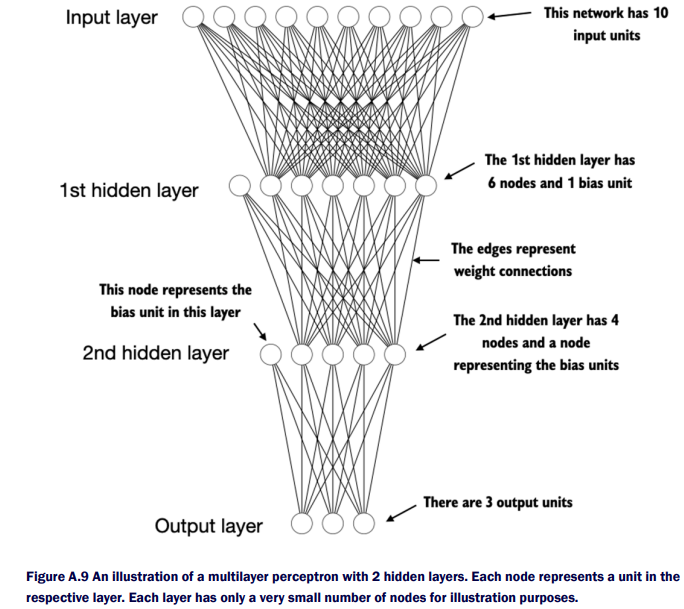


In PyTorch, we typically subclass the ```torch.nn.Module``` class to define our own custom network architecture.
This ```Module``` base class provides a lot of functionality, making it easier to build and train models.
For instance, it allows us to encapsulate layers and operations and keep track of the model's parameters.

Within this subclass, we define the network layers in the ```__init__``` constructor and
specify how they interact in the forward method. The forward method describes ho

In [23]:
## multilayer perceptron with two hidden layers

class NeuralNetwork(torch.nn.Module):
    # Initialize the neural network
    # It's useful to code the number of inputs and outputs as variables to reuse the same code for datasets with different numbers of features and classes.
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(
            
            # First hidden layer
            torch.nn.Linear(num_inputs, 30), #  The Linear layer takes the number of input and output nodes as arguments.
            torch.nn.ReLU(),              #  ReLU activation function (Nonlinear activation functions are placed between the hidden layers)
            
            # Second hidden layer
            torch.nn.Linear(30, 20),      #  The number of output nodes of one hidden layer has to match the number of inputs of the next layer.
            torch.nn.ReLU(),             #  ReLU activation function
            
            # Output layer
            torch.nn.Linear(20, num_outputs), #  No activation function here for regression tasks
            
        )
        
    def forward(self, x):
        logits = self.layers(x) # Pass the input through the layers defined in __init__
        return logits      # Return the output logits (The outputs of the last layer are called logits)

We can now instantiate a new neural network object

In [24]:
model = NeuralNetwork(50, 3)
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


Note that we used the ```Sequential``` class when we implemented the ```NeuralNetwork``` class.
Using Sequential is not required, but it can make our life easier if we have a series of layers that we want to execute in a specific order, as is the case here.

This way, after instantiating ```self.layers = Sequential(...)``` in the ```__init__``` constructor, we just have to call the
self.layers instead of calling each layer individually in the NeuralNetwork's forward method.

Next, let's check the total number of trainable parameters of this model:


In [25]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


Note that each parameter for which requires_grad=True counts as a trainable parameter
and will be updated during training